# "Компьютерное зрение"
## Цель проекта: постороить модель для определение возраста человека по фотографии.
## Данные предоставлены образовательной платформой "Яндекс.Практика" 


## Исследовательский анализ данных

In [30]:
import pandas as pd
from IPython.display import Image
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [31]:
labels = pd.read_csv('/datasets/faces/labels.csv')


In [32]:
display(labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

In [33]:
display(labels.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [34]:
display(labels.tail())

,file_name,real_age
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20
7590,007612.jpg,47


In [35]:
datagen = ImageDataGenerator(rescale=1./255)
train_datagen = datagen.flow_from_dataframe(dataframe=labels,
                                            directory='/datasets/faces/final_files/', x_col='file_name',
                                            y_col='real_age', target_size=(224, 224), batch_size=32,
                                            class_mode='raw', seed=12345) 

Found 7591 validated image filenames.


In [36]:
features, target = next(train_datagen)

print(features.shape) 

(32, 224, 224, 3)


In [37]:
year_count_piples = labels.pivot_table(index='real_age', aggfunc={'file_name':'count'})
year_count_piples.columns = ['count']

<AxesSubplot:title={'center':'График распределения возраста в выборке'}, xlabel='real_age'>

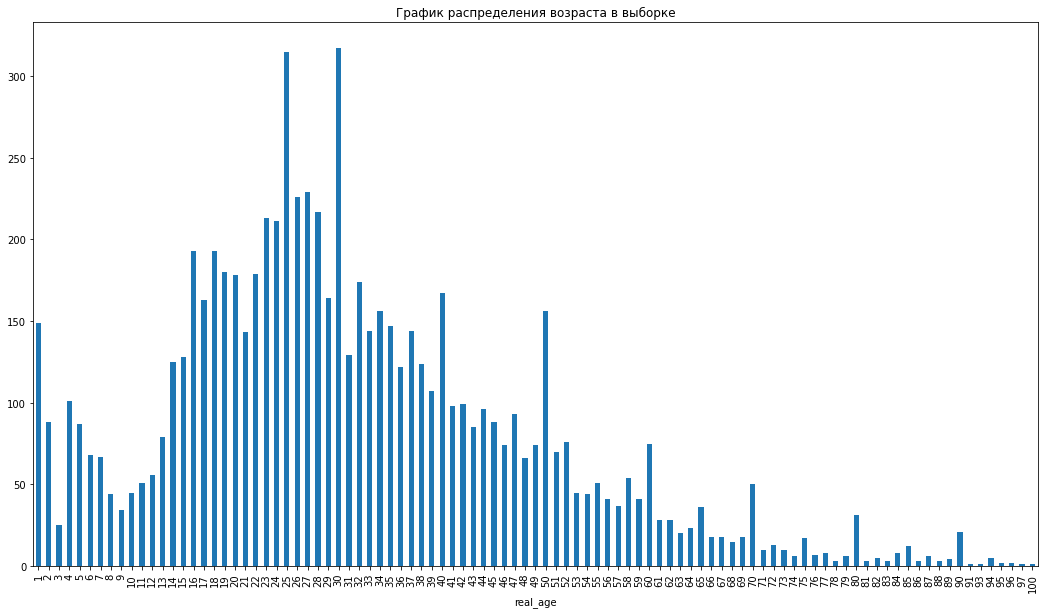

In [38]:
year_count_piples.plot(y='count', kind='bar', figsize=(18, 10), title = 'График распределения возраста в выборке', legend=False)

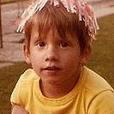

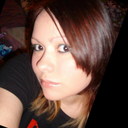

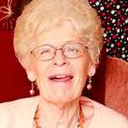

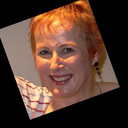

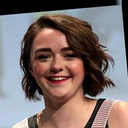

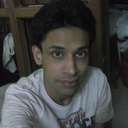

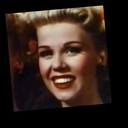

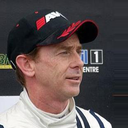

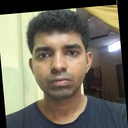

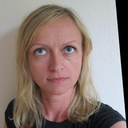

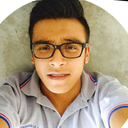

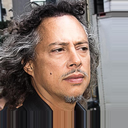

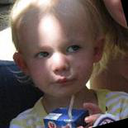

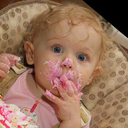

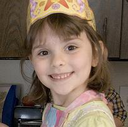

In [39]:
size = 128, 128
for x in range(15):
    im = Image.open('/datasets/faces/final_files/'+labels['file_name'][x])
    im.thumbnail(size, Image.ANTIALIAS)
    display(im)   

## Вывод 

Иследование показало что распределение по возрасту имеет особенности, в частности то что при возрасте больше 20 лет есть характерныее выбросы в значениях возраста соответствуящая юбилеям, таким как 30, 40, 50 и тд. Отдельные изображения повернуты. Все картинки имеют различнное разрешение. 
    При проведение обучения скорее всего изображения необходимо будет привести к единому разрешения.
    Наверно нужно будет объеденить картинки по возрвстным группам, допустим с шагом в 5 лет.    

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, AvgPool2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator



def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255)

    train_datagen_flow = datagen.flow_from_dataframe(labels,
                                                     directory= path + '/final_files/',
                                                     x_col='file_name',
                                                     y_col='real_age',
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     class_mode='raw',
                                                     subset='training',
                                                     seed=12345)
    return train_datagen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255)

    test_datagen_flow = datagen.flow_from_dataframe(labels,
                                                     directory=path + '/final_files/',
                                                     x_col='file_name',
                                                     y_col='real_age',
                                                     target_size=(224, 224),
                                                     batch_size=32,
                                                     class_mode='raw',
                                                     subset='validation',
                                                     seed=12345)
    return test_datagen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)

    optimizer = Adam(lr=0.0001)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
    return model
   

# < скопируйте код сюда >

```

```

 8192/94765736 [..............................] - ETA: 4s
  229376/94765736 [..............................] - ETA: 21s
 1196032/94765736 [..............................] - ETA: 7s 
 4161536/94765736 [>.............................] - ETA: 4s
 4202496/94765736 [>.............................] - ETA: 7s
 6316032/94765736 [>.............................] - ETA: 6s
 8396800/94765736 [=>............................] - ETA: 6s
10543104/94765736 [==>...........................] - ETA: 5s
12591104/94765736 [==>...........................] - ETA: 5s
14770176/94765736 [===>..........................] - ETA: 5s
16785408/94765736 [====>.........................] - ETA: 4s
18997248/94765736 [=====>........................] - ETA: 4s
20979712/94765736 [=====>........................] - ETA: 4s
23224320/94765736 [======>.......................] - ETA: 4s
25174016/94765736 [======>.......................] - ETA: 4s
27451392/94765736 [=======>......................] - ETA: 4s
29368320/94765736 [========>.....................] - ETA: 3s
31678464/94765736 [=========>....................] - ETA: 3s
33562624/94765736 [=========>....................] - ETA: 3s
35889152/94765736 [==========>...................] - ETA: 3s
37756928/94765736 [==========>...................] - ETA: 3s
40116224/94765736 [===========>..................] - ETA: 3s
41951232/94765736 [============>.................] - ETA: 3s
44326912/94765736 [=============>................] - ETA: 2s
46145536/94765736 [=============>................] - ETA: 2s
48553984/94765736 [==============>...............] - ETA: 2s
50339840/94765736 [==============>...............] - ETA: 2s
52764672/94765736 [===============>..............] - ETA: 2s
54534144/94765736 [================>.............] - ETA: 2s
56991744/94765736 [=================>............] - ETA: 2s
58728448/94765736 [=================>............] - ETA: 2s
61202432/94765736 [==================>...........] - ETA: 1s
62922752/94765736 [==================>...........] - ETA: 1s
65429504/94765736 [===================>..........] - ETA: 1s
67117056/94765736 [====================>.........] - ETA: 1s
69640192/94765736 [=====================>........] - ETA: 1s
71311360/94765736 [=====================>........] - ETA: 1s
73867264/94765736 [======================>.......] - ETA: 1s
75505664/94765736 [======================>.......] - ETA: 1s
78077952/94765736 [=======================>......] - ETA: 0s
79699968/94765736 [========================>.....] - ETA: 0s
82288640/94765736 [=========================>....] - ETA: 0s
83894272/94765736 [=========================>....] - ETA: 0s
86515712/94765736 [==========================>...] - ETA: 0s
88088576/94765736 [==========================>...] - ETA: 0s
90726400/94765736 [===========================>..] - ETA: 0s
92282880/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 5s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/5
2022-09-10 15:14:17.559997: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-10 15:14:18.363694: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 64s - loss: 236.2963 - mae: 10.9619 - val_loss: 914.8288 - val_mae: 25.4246
Epoch 2/5
178/178 - 41s - loss: 60.1051 - mae: 5.8726 - val_loss: 829.1358 - val_mae: 23.9136
Epoch 3/5
178/178 - 40s - loss: 29.7381 - mae: 4.2052 - val_loss: 277.5439 - val_mae: 12.2453
Epoch 4/5
178/178 - 40s - loss: 18.9428 - mae: 3.3659 - val_loss: 150.2588 - val_mae: 9.1937
Epoch 5/5
178/178 - 40s - loss: 15.1109 - mae: 2.9849 - val_loss: 77.5219 - val_mae: 6.6844
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 77.5219 - mae: 6.6844
Test MAE: 6.6844
# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

```

## Анализ обученной модели

## Вывод:
    1. Разработанная модель выполняет поставленную задачу согласно заданым условиям. Метрика MAE на валидационной выборке 6.6844.
    2. При разработке модели использовалась глубокая сеть ResNet50. Данная сеть при настройке параметров справилась с поставленной задачей.
    3. Результат получен при при lr=0.0001, при lr=0.001 добиться результата не получилось, проскакивали минимум.
    4. Модель возможно обучить еще, с целью снижения значения метрика MAE, но нужно будет точно подобрать значения эпох, чтобы модель не переобучилась.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы